#  Lab Class: The Perceptron Algorithm



In this lab, we will explore the Perceptron algorithm, a fundamental building block in the field of machine learning, specifically in supervised learning. The Perceptron is a linear classifier that updates its weights based on the classification error.

We will start by understanding the mathematical foundation of the Perceptron, then move on to implementing the algorithm . Finally, we'll see how it works with a simple one-dimensional example as well as the Two-dimensional data.



### Problem Setup

- **Feature Space**: $ X \subset \mathbb{R}^n $

- **Label Space**: $ Y = \{-1, 1\} $

- **Data**: $ \{(x_t, y_t)\}_{t=1}^T $, where $ x_t \in X $ and $ y_t \in Y $

### Algorithm

1. Initialize the weight vector $ w_1 = w_0 $.

2. For each $ t = 1, \dots, T $:

   - Compute the prediction: $ a_t = \text{sgn}(w_t^\top x_t) $.


   - If $ a_t \neq y_t $, update the weights: $ w_{t+1} = w_t + y_t x_t $.
   
   - Otherwise, keep the weights unchanged: $ w_{t+1} = w_t $.
   
3. Return the final weight vector $ w_{T+1} $.

The sign function maps the scalar output of the dot product to one of the two possible classes $ \{-1, 1\} $.



The `sgn` function is defined as follows:

$$
\text{sgn}(z) =
\begin{cases}
1 & \text{if } z \geq 0 \\
-1 & \text{if } z < 0
\end{cases}
$$

 note that $\text{sgn}(0)=1$ by convention.

In this context of the Perceptron algorithm:

* If $ w_t^\top x_t \geq 0 $, the prediction $ a_t $ is $ 1 $.

* If $ w_t^\top x_t < 0 $, the prediction $ a_t $ is $ -1 $.


## Example 1: One-Dimensional Data


To better understand the Perceptron algorithm, consider a simple one-dimensional example where the data points
lie on a line. We'll work through this example to see how the algorithm converges.




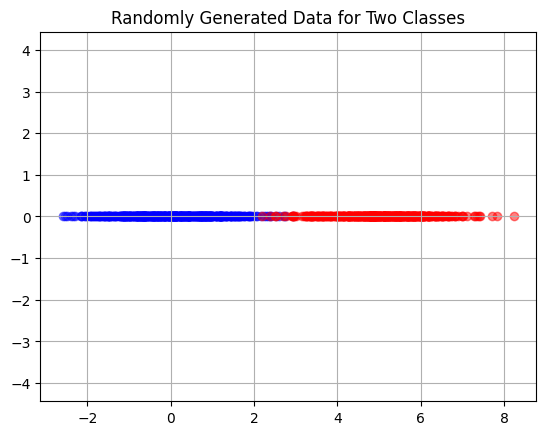

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Generate some random data of two clases
n_samples = 1000
features = np.random.normal(0, 1, (n_samples, 1))  # One-dimensional feature data
classes = np.random.choice(2, size=n_samples)  # Randomly assigned class labels (0 or 1)

# Shift class 1 features to make them distinct from class 0
features[classes==1]+=5  # Adding 5 to x and y coordinates of class 1

# Plot the data
plt.scatter(features[classes == 0], np.zeros_like(features[classes == 0]), label="Class 0", color='blue', alpha=0.5)
plt.scatter(features[classes == 1], np.zeros_like(features[classes == 1]), label="Class 1", color='red', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.title("Randomly Generated Data for Two Classes")
#plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(features, classes, iterations=100):
    # Initialise parameters
    w_t = np.random.uniform(size=1 + features.shape[1])  # Weight vector (including bias)
    n_data = features.shape[0]
    labels = np.zeros(n_data)  # Array to store predicted labels

    # Map class labels from (0, 1) → (-1, 1)
    y = np.where(classes == 0, -1, 1)

    for k in range(iterations):
        n_errors = 0  # Count of misclassified samples

        for t in range(n_data):

             ######################### TO DO: fill in

            # Input vector x_t by adding a bias term (of size 1), using np.concatenate(([],)) So  shape= (1 + n_features,)
            #TO DO

            # Calculate output using sign of dot product between w_t and x_t. call it :prediction
            #TO DO

            # Store the prediction in {-1, 1}
            if prediction == 0:
                prediction = 1
            labels[t] = prediction

            # Update the weight if there is a misclassification ie when class != labels[t]
            # TO DO
                  # Update the weights
                  # Increment error count

        # Print the error rate after each iteration
        print(f"Iteration {k+1}: Error rate = {n_errors / n_data}")

    # TO DO
    #return weight and label

# Train the perceptron
weights, predictions = perceptron(features, classes, iterations=100)
print("\nFinal weights:", weights)

SyntaxError: incomplete input (1491216811.py, line 39)

In [15]:
#TO DO
## PLOT THE DECISION BOUNDARY HERE
# in our parametrisation, we have a = w[0] + x w[1]
# so as a = 0 is the decision boundary, we can solve for the x coordinate
# Compute decision boundary (x = -w_0 / w_1)

# Compute decision boundary
x_boundary = -weights[0] / weights[1]

# Plot the 1D data
plt.scatter(features[classes == 0], np.zeros_like(features[classes == 0]),
            label="Class 0", alpha=0.5)
plt.scatter(features[classes == 1], np.zeros_like(features[classes == 1]),
            label="Class 1", alpha=0.5)

# Plot the decision boundary as a vertical line
plt.axvline(x=x_boundary, color='red', linestyle='--', label=f"Decision boundary (x={x_boundary:.2f})")

plt.title("1D Data with Perceptron Decision Boundary")
plt.xlabel("Feature value")
plt.ylabel("y axis (for visualization)")
plt.legend()
plt.grid()
plt.show()



 ## Example 2: Two-Dimensional Data

 In this example, we will define a set of 2D feature points, their corresponding labels, and implement the Perceptron algorithm.

Let’s define the following dataset:


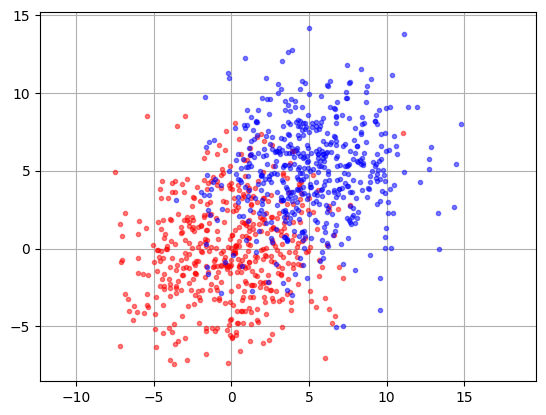

In [18]:
import numpy as np
import matplotlib.pyplot as plt

## Generate some random data of two clases
mean1 = [0, 0]
covariance = [[10,1], [1,10]]
n_samples = 1000
features1 = np.random.multivariate_normal(mean1, covariance, n_samples)

# Randomly assign classes (0 or 1) to each sample
classes = np.random.choice(2, size=n_samples)

# Shift class 1 features to make them distinct from class 0
features1[classes==1]+=5  # Adding 5 to x and y coordinates of class 1

plt.plot(features1[classes==0,0], features1[classes==0,1], 'r.', alpha=0.5)
plt.plot(features1[classes==1,0], features1[classes==1,1], 'b.', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()



In [21]:
weights, predictions = perceptron(features1, classes, iterations=10)

Iteration 1: Error rate = 0.216
Iteration 2: Error rate = 0.174
Iteration 3: Error rate = 0.181
Iteration 4: Error rate = 0.192
Iteration 5: Error rate = 0.197
Iteration 6: Error rate = 0.182
Iteration 7: Error rate = 0.198
Iteration 8: Error rate = 0.183
Iteration 9: Error rate = 0.183
Iteration 10: Error rate = 0.184


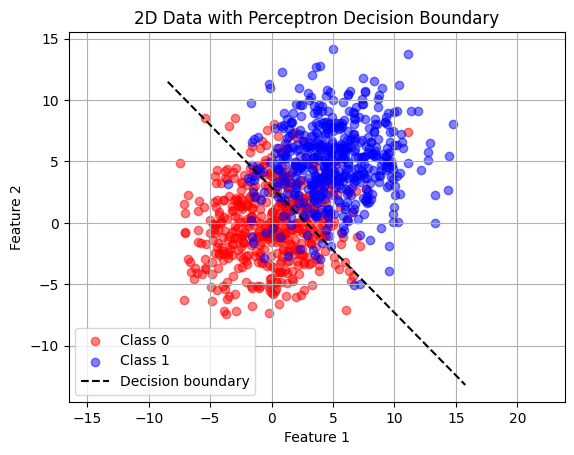

In [22]:


## plot the BOUNDARY

# in our parametrisation, we have a = w[0] + x w[1] + y w[2] and  weights from perceptron: w = [bias, w1, w2]
# so as a = 0 is the decision boundary, we can solve for the y coordinate
#Solve for y: y = -(w[0] + w[1]*x) / w[2]

# Create a range of x values to plot the line
X = np.linspace(np.min(features1[:,0])-1, np.max(features1[:,0])+1, 100)
Y = -(weights[0] + weights[1]*X) / weights[2]

# Plot the 2D data points
plt.scatter(features1[classes==0,0], features1[classes==0,1], color='red', alpha=0.5, label='Class 0')
plt.scatter(features1[classes==1,0], features1[classes==1,1], color='blue', alpha=0.5, label='Class 1')

# Plot the decision boundary
plt.plot(X, Y, 'k--', label='Decision boundary')

plt.axis('equal')
plt.grid()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Data with Perceptron Decision Boundary")
plt.legend()
plt.show()


##  Gradient descent Implementation

The gradient descent algorithm iteratively updates parameters to minimize a function $ f(\theta) $. The basic update rule is:

$$
\theta_{t+1} = \theta_t - \alpha_t \nabla_{\theta} f(\theta_t)
$$

Where:
- $ \theta_t $ is the parameter at iteration $t $.

- $ \alpha_t $ is the learning rate (a small value that controls how much we update the parameters).

- $ \nabla_{\theta} f(\theta_t) $ is the gradient (the slope) of the function at $ \theta_t $.

#### **1.2. Example Function**
For implementation, We'll use a simple quadratic function for demonstration:

$$
f(\theta) = \theta^2
$$

- Derivative of the function:
 $$
  \nabla_{\theta} f(\theta) = 2\theta
  $$


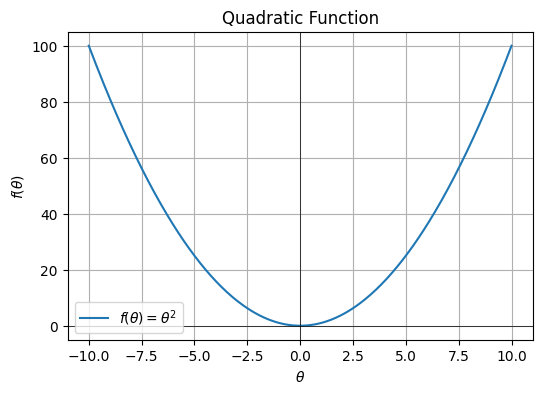

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function f(θ) = θ^2
def f(theta):
    return theta ** 2

# Create values of theta for plotting
theta_values = np.linspace(-10, 10, 400)
function_values = f(theta_values)

# Plot the quadratic function
plt.figure(figsize=(6, 4))
plt.plot(theta_values, function_values, label=r'$f(\theta) = \theta^2$')
plt.title("Quadratic Function")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$f(\theta)$")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:

### Implementation of Gradient Descent

# Derivative of the function: ∇f(θ) = 2θ
def grad_f(theta):
    ##TO DO
    # Return thederivative here

# Gradient Descent Algorithm
def gradient_descent(initial_theta, learning_rate, iterations):
    theta = initial_theta  # Initialize θ
    theta_history = [theta]  # To store the value of θ over iterations

    for t in range(iterations):
        # Compute the gradient of f at θ (just call the function)
        #TO DO

        # Update θ using the gradient descent update rule
        #TO DO

        # Save the new value of θ
        theta_history.append(theta)

        # Print progress
        print(f"Iteration {t+1}: θ = {theta}, f(θ) = {f(theta)}")

    return theta, theta_history


In [25]:
# Parameters
initial_theta = 10.0
learning_rate = 0.1
iterations = 50       # Number of iterations

# Run Gradient Descent
theta, theta_history = gradient_descent(initial_theta, learning_rate, iterations)


In [29]:

#We can visualize how $ \theta $ evolves and how the function value decreases over time.

# Plot the value of θ over iterations
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(theta_history, label="θ")
plt.xlabel("Iterations")
plt.ylabel("θ Value")
plt.title("Gradient Descent: Evolution of θ")
plt.legend()
plt.grid(True)
#plt.show()

# Plot the function value f(θ) over iterations
plt.subplot(1,2,2)
plt.plot([f(t) for t in theta_history], label="f(θ)")
plt.xlabel("Iterations")
plt.ylabel("f(θ) Value")
plt.title("Gradient Descent: Function Value over Iterations")
plt.legend()
plt.grid(True)
plt.show()


Let's  plot the history of  $ \theta_t $ values at each iteration, marking how they approach the minimum. The steps can be visualized as red circles along the quadratic curve.

In [30]:
# Plot the quadratic function
plt.figure(figsize=(8, 6))
plt.plot(theta_values, function_values, label=r'$f(\theta) = \theta^2$', color="blue")

# Plot the history of theta values during gradient descent
theta_history= np.array(theta_history)
plt.plot(theta_history, f(theta_history), marker="o", color="red", label="Gradient Descent Steps")
plt.title("Gradient Descent on Quadratic Function")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$f(\theta)$")
plt.grid(True)
plt.legend()
plt.show()


# ASSIGNMENT 3

###  1) Experimentation : Effect of Learning Rate

Try different values for the learning rate in the GD code above to observe how the convergence speed changes.

### Questions to Discuss:
  - How does the learning rate affect the optimization process?
  - What happens if the learning rate is too large?
  - Why does the function value keep decreasing?


### 2) Non-Quadratic Function

Extend your curiosity by introducing a more complex function, like a cubic or exponential function, to show how gradient descent behaves in different situations.

Example:
$$
f(\theta) = \theta^4 - 3\theta^3 + 2
$$

####  Learning Rate Schedule
You can also experiment with changing the learning rate over time, i.e., it changes as $ t $ increases. An example schedule could be reducing the learning rate as the iterations progress:

$$
\alpha_t = \frac{1}{t+1}
$$
  


## Stochastic Gradient Descent (aka Gradient Descent with Noise)


This is the same as the gradient method, but with added noise.
Noise is there naturally sometimes. In fact, minimising the empirical error is like minimising a noisy version of the true error.

However, adding noise explicitly to a gradient also can make the algorithm more robust and prevent getting stuck in local minima.
For the second case, we add a noise term $ \omega_t $ to the gradient:
$$
\theta_{t+1} = \theta_t - \alpha_t \left( \nabla_{\theta} f(\theta_t) + \omega_t \right)
$$

Where:
- $ \alpha_t $ is the learning rate at time $ t $.
- $ \nabla_{\theta} f(\theta_t) $ is the gradient of the function at $ \theta_t $.
- $ \omega_t $ is a noise term with expectation $ E[\omega_t] = 0 $. The noise here is sampled from a normal distribution $ N(0, \text{noise\_std}) $, where `noise_std` controls the level of noise.
  
The update rule in the noisy SGD is:
  $$
  \theta_{t+1} = \theta_t - \alpha_t \left( \nabla_{\theta} f(\theta_t) + \omega_t \right)
 $$


We'll use the same quadratic function $ f(\theta) = \theta^2 $.


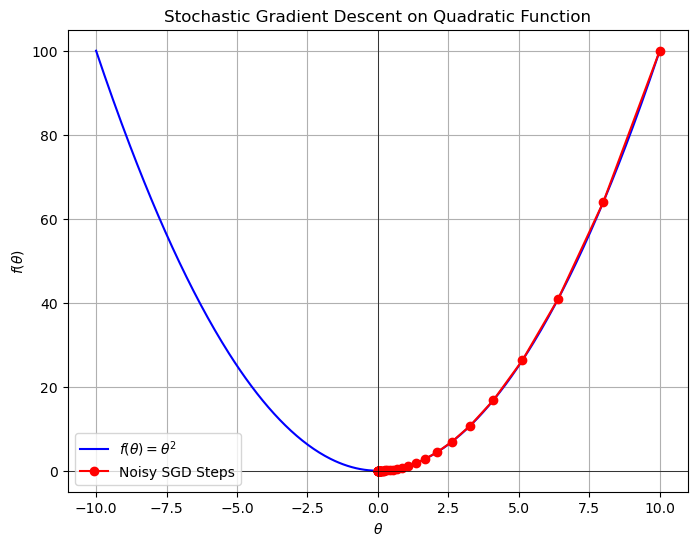

In [ ]:
# Stochastic Gradient Descent Algorithm
def stochastic_gradient_descent(initial_theta, learning_rate, iterations, noise_std):
    theta = initial_theta  # Initialize θ
    theta_history = [theta]  # To store the value of θ over iterations

    for t in range(iterations):
        # Compute the gradient
        grad = grad_f(theta)

        # Generate noise with mean 0 and standard deviation noise_std
        noise = np.random.normal(0, noise_std)

        # Update θ using the noisy gradient descent update rule
        theta = theta - learning_rate * (grad + noise)

        # Save the new value of θ
        theta_history.append(theta)
        #print(f"Iteration {t+1}: θ = {theta}, f(θ) = {f(theta)}")

    return theta_history,theta

noise_std = 0.1        # Standard deviation of the noise

# Run Noisy Stochastic Gradient Descent
theta_history_noisy_sgd, theta = stochastic_gradient_descent(initial_theta, learning_rate, iterations, noise_std)

# Plot the quadratic function
plt.figure(figsize=(8, 6))
plt.plot(theta_values, function_values, label=r'$f(\theta) = \theta^2$', color="blue")

# Plot the history of θ values during noisy SGD
theta_history_noisy_sgd= np.array(theta_history_noisy_sgd)
plt.plot(theta_history_noisy_sgd, f(theta_history_noisy_sgd), marker="o", color="red", label="Noisy SGD Steps")
plt.title("Stochastic Gradient Descent on Quadratic Function")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$f(\theta)$")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()


### 3) Experiment with Different Noise Levels
You can experiment with different levels of noise by adjusting the `noise_std` parameter and observing how it impacts the convergence.

### Questions to Discuss
- What effect does the added noise have on the convergence of SGD?
- Why might adding noise be beneficial in some optimization problems?
- How does the learning rate influence the Stochastic gradient descent method?
